In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from scipy.integrate import quad#
import mplhep as hep
import numpy as np
import pandas as pd
import sympy as sp
hep.style.use(hep.style.ATLAS)
import matplotlib.ticker as ticker
mpl.rcParams['font.family'] = 'Times New Roman'
sns.set_theme(context='talk', style='white')

def scientific_formatter(x, pos):
    if x == 0:
        return r'$0$'  
    exponent = int(np.floor(np.log10(np.abs(x))))
    coeff = x / 10**exponent
    return r'${:.1f} \times 10^{{{}}}$'.format(coeff, exponent)

from sympy import latex
from sympy import init_printing
init_printing(use_latex=True)


#### Using equation (6) of the [ArXiv: 2305.09015](https://arxiv.org/pdf/2305.09015) 

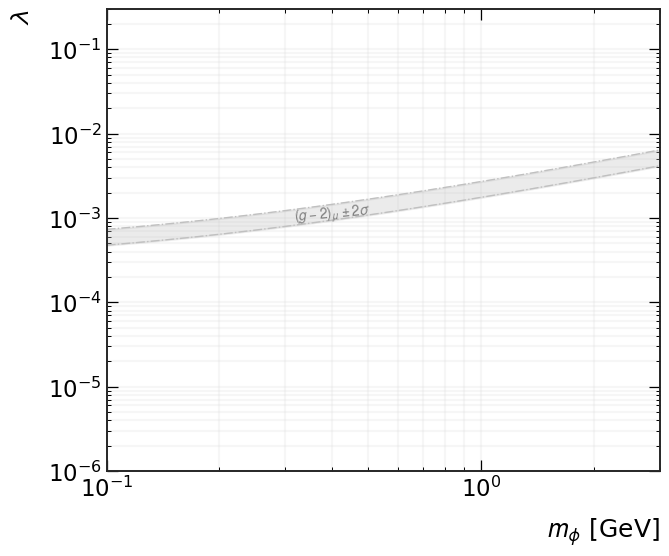

In [16]:
delta_central, delta_min, delta_max = 251*10**(-11), (251-(2*51))*10**(-11), (251+(2*51))*10**(-11)  # Central, min, and max value of Delta a_mu
#delta_central, delta_min, delta_max = 105.47*10**(-11), (105.47-(2*61.92))*10**-11, (105.47+(2*61.92))*10**-11
 # Particle mass and parameters
m_mu = 0.105  # Muon mass in GeV 
epsilon = 1.0  # m_mu/m_mu


# Integrand function
def integrand(x, epsilon, lambda_sq):
    numerator = x**2 * (1 - x + epsilon)
    denominator = (1 - x) * (1 - lambda_sq * x) + lambda_sq * x * epsilon**2
    return numerator / denominator

M_phi_values = np.linspace(0.1, 3, 1000)  # M_phi values between 0.1 and 3 GeV
gs_min_values2 = []
gs_max_values2 = []

for M_phi in M_phi_values:
    lambda_sq = (m_mu / M_phi)**2
    integral_value, error = quad(integrand, 0, 1, args=(epsilon, lambda_sq))
    lambda_squared_min = (delta_min * 2 * (4 * np.pi**2) * M_phi**2) / (m_mu**2 * integral_value)
    gs_min2 = np.sqrt(lambda_squared_min) if lambda_squared_min >= 0 else np.nan
    gs_min_values2.append(gs_min2)
    lambda_squared_max = (delta_max * 2 * (4 * np.pi**2) * M_phi**2) / (m_mu**2 * integral_value)
    gs_max2 = np.sqrt(lambda_squared_max) if lambda_squared_max >= 0 else np.nan
    gs_max_values2.append(gs_max2)

# Create DataFrame for gs values
df = pd.DataFrame({'M_phi': M_phi_values, 'gs_min2': gs_min_values2, 'gs_max2': gs_max_values2})
# df.to_csv('lambda_vs_Mphi_with_delta.csv', index=False)

# Plotting the data
fig, ax = plt.subplots(figsize=(7, 6))
ax.fill_between(df['M_phi'], df['gs_min2'], df['gs_max2'], color="silver", alpha=0.3)
ax.plot(df['M_phi'], df['gs_min2'], label="gs (delta_min)", linestyle='-.', color='silver', linewidth=1)
ax.plot(df['M_phi'], df['gs_max2'], label="gs (delta_max)", linestyle='-.', color='silver', linewidth=1)
ax.text(0.4, 1.1e-3, r'$(g - 2)_\mu \pm 2\sigma$', fontsize=10, color='gray', rotation=5., ha='center', va='center')
ax.set_xlabel(r'$m_{\phi}$ [GeV]', size=18, color='black')
ax.set_ylabel(r'$\lambda$', size=18, color='black')
# ax.yaxis.set_major_formatter(ticker.FuncFormatter(scientific_formatter))
ax.tick_params(direction='in', length=8, width=0.9, colors='black', which='major', top=True, right=True)
ax.tick_params(direction='in', length=3.2, width=0.7, colors='black', which='minor', top=True, right=True)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
for spine in ax.spines.values():
    spine.set_linewidth(1.4)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim([10**(-6), 3 * 10**(-1)])
ax.set_xlim([10**(-1), 3 * 10**(0)])
ax.grid(True, which="both", ls="-", color='lightgray', alpha=0.2)
plt.show()


#### Using euation 20(a) of the [ArXiv: 1610.06587](https://arxiv.org/abs/1610.06587)

In [15]:

# New integrand function
def integrand_new(x, m_mu, m_S):
    numerator = m_mu**2 * (1 - x) * (1 - x**2)
    denominator = m_mu**2 * (1 - x)**2 + m_S**2 * x
    return numerator / denominator

m_S_values = np.linspace(0.1, 3, 1000)
gs_min_values_new = []
gs_max_values_new = []
gs_central_values_new = []

for m_S in m_S_values:
    integral_value_new, error = quad(integrand_new, 0, 1, args=(m_mu, m_S))
    gs_central_new = np.sqrt((delta_central * 8 * np.pi**2) / integral_value_new)  # if integral_value_new > 0 else np.nan
    gs_central_values_new.append(gs_central_new)
    gs_min_new = np.sqrt((delta_min * 8 * np.pi**2) / integral_value_new)  # if integral_value_new > 0 else np.nan
    gs_min_values_new.append(gs_min_new)
    gs_max_new = np.sqrt((delta_max * 8 * np.pi**2) / integral_value_new)  # if integral_value_new > 0 else np.nan
    gs_max_values_new.append(gs_max_new)

# Create DataFrame for new gs values
df_new = pd.DataFrame({
    'm_S': m_S_values, 
    'gs_min': gs_min_values_new, 
    'gs_max': gs_max_values_new,
    'gs_central': gs_central_values_new
}).astype(float)

# Plotting the new data
fig, ax = plt.subplots(figsize=(7, 6))
ax.plot(df_new['m_S'], df_new['gs_central'], linestyle='-', color='silver', linewidth=1)
ax.plot(df_new['m_S'], df_new['gs_min'], linestyle='-.', color='silver', linewidth=1)
ax.plot(df_new['m_S'], df_new['gs_max'], linestyle='-.', color='silver', linewidth=1)
ax.fill_between(df_new['m_S'], df_new['gs_min'], df_new['gs_max'], color='silver', alpha=0.5)
ax.text(0.4, 1.1e-3, r'$(g - 2)_\mu \pm 2\sigma$', fontsize=10, color='gray', rotation=5., ha='center', va='center')
ax.legend(loc='best', fontsize=12)
ax.set_xlabel(r'$m_{\phi}$ [GeV]', size=18, color='black')
ax.set_ylabel(r'$\lambda$', size=18, color='black')
# ax.yaxis.set_major_formatter(ticker.FuncFormatter(scientific_formatter))
ax.tick_params(direction='in', length=8, width=0.9, colors='black', which='major', top=True, right=True)
ax.tick_params(direction='in', length=3.2, width=0.7, colors='black', which='minor', top=True, right=True)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
for spine in ax.spines.values():
    spine.set_linewidth(1.4)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim([10**(-6), 3 * 10**(-1)])
ax.set_xlim([10**(-1), 3 * 10**(0)])
ax.grid(True, which="both", ls="-", color='lightgray', alpha=0.2)
plt.tight_layout()
plt.show()


/tmp/ipykernel_297146/2443708776.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='best', fontsize=12)
